In [1]:
!pip install ultralytics roboflow --upgrade -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.9/976.9 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9

In [ ]:
import os
import torch
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Step 1: Environment Setup
!pip install ultralytics roboflow --upgrade -q

In [ ]:
# Step 2: Import Required Libraries
from roboflow import Roboflow
import matplotlib.pyplot as plt
import cv2

In [ ]:
# Step 3: Connect to Roboflow Dataset
from roboflow import Roboflow
rf = Roboflow(api_key="GnZCZZKyd3ZTNX3nGdCF")
project = rf.workspace("subhash-madhuwantha-dl3uv").project("sltplatedetector")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to sltPlateDetector-1 in yolov8:: 100%|██████████| 1778/1778 [00:00<00:00, 5731.86it/s]


In [ ]:
# Step 4: Verify Dataset Path
print("Dataset downloaded to:", dataset.location)


Dataset downloaded to: /content/sltPlateDetector-1


In [ ]:
# Step 5: Split Dataset
def split_dataset(dataset_path, train_ratio=0.8):
    image_dir_train = os.path.join(dataset_path, "train", "images")
    label_dir_train = os.path.join(dataset_path, "train", "labels")

    image_dir_valid = os.path.join(dataset_path, "valid", "images")
    label_dir_valid = os.path.join(dataset_path, "valid", "labels")

    image_dir_test = os.path.join(dataset_path, "test", "images")
    label_dir_test = os.path.join(dataset_path, "test", "labels")

    # Ensure the directories exist
    if not os.path.exists(image_dir_train):
        raise FileNotFoundError(f"No such file or directory: '{image_dir_train}'")
    if not os.path.exists(label_dir_train):
        raise FileNotFoundError(f"No such file or directory: '{label_dir_train}'")

    if not os.path.exists(image_dir_valid):
        raise FileNotFoundError(f"No such file or directory: '{image_dir_valid}'")
    if not os.path.exists(label_dir_valid):
        raise FileNotFoundError(f"No such file or directory: '{label_dir_valid}'")

    if not os.path.exists(image_dir_test):
        raise FileNotFoundError(f"No such file or directory: '{image_dir_test}'")
    if not os.path.exists(label_dir_test):
        raise FileNotFoundError(f"No such file or directory: '{label_dir_test}'")

    images_train = [img for img in os.listdir(image_dir_train) if img.endswith(('.jpg', '.png'))]
    train_size = int(len(images_train) * train_ratio)

    train_images = images_train[:train_size]
    valid_images = images_train[train_size:]

    for split in ["train", "valid"]:
        os.makedirs(os.path.join(dataset_path, split, "images"), exist_ok=True)
        os.makedirs(os.path.join(dataset_path, split, "labels"), exist_ok=True)

    for img_set, split in [(train_images, "train"), (valid_images, "valid")]:
        for img in img_set:
            os.rename(os.path.join(image_dir_train, img), os.path.join(dataset_path, split, "images", img))
            label = img.replace('.jpg', '.txt').replace('.png', '.txt')
            os.rename(os.path.join(label_dir_train, label), os.path.join(dataset_path, split, "labels", label))

split_dataset(dataset.location)

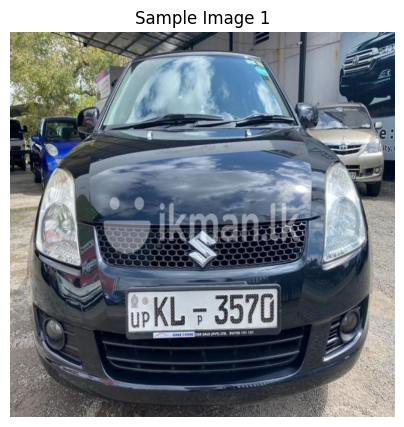

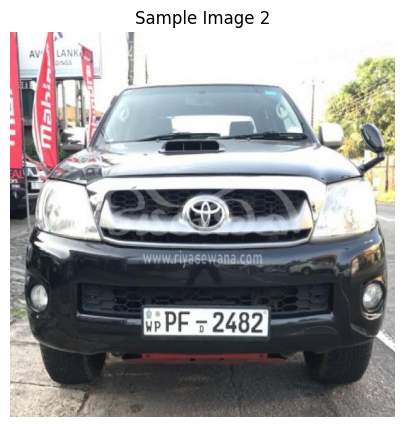

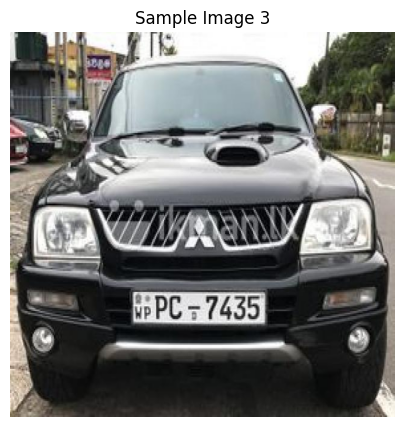

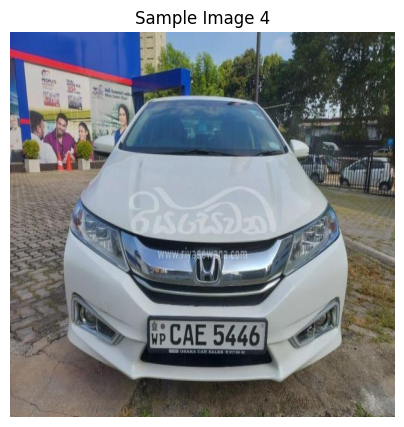

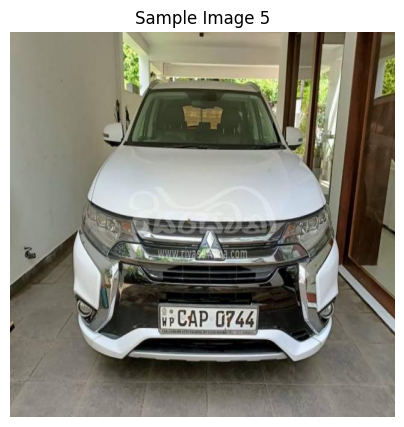

In [ ]:
# Step 6: Display Sample Images
def show_sample_images(image_dir, num_images=5):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir) if img.endswith(('.jpg', '.png'))]
    for i, image_path in enumerate(image_paths[:num_images]):
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Sample Image {i+1}")
        plt.show()

show_sample_images(os.path.join(dataset.location, "train", "images"))

In [ ]:
# Step 7: Load YOLOv8 Model
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 115MB/s]


In [ ]:
# Step 8: Train the Model
model.train(
    data=os.path.join(dataset.location, "data.yaml"),
    epochs=50,
    imgsz=640,
    batch=16,
    name="license_plate_detection"
)

Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/sltPlateDetector-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=license_plate_detection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

100%|██████████| 755k/755k [00:00<00:00, 67.7MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 196MB/s]


AMP: checks passed ✅


train: Scanning /content/sltPlateDetector-1/train/labels... 564 images, 0 backgrounds, 0 corrupt: 100%|██████████| 564/564 [00:00<00:00, 2227.88it/s]

train: New cache created: /content/sltPlateDetector-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/sltPlateDetector-1/valid/labels... 230 images, 2 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<00:00, 1122.29it/s]

val: New cache created: /content/sltPlateDetector-1/valid/labels.cache


Plotting labels to runs/detect/license_plate_detection/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/license_plate_detection
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       2.1G      1.153      2.625      1.101          6        640: 100%|██████████| 36/36 [00:12<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.51it/s]

                   all        230        228      0.964      0.473      0.773      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.58G      1.194      1.704      1.045          5        640: 100%|██████████| 36/36 [00:10<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.58it/s]

                   all        230        228       0.97      0.721      0.904      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       2.6G      1.155      1.436      1.087          8        640: 100%|██████████| 36/36 [00:10<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.50it/s]

                   all        230        228      0.824      0.846      0.883      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.62G      1.163      1.251      1.076          9        640: 100%|██████████| 36/36 [00:11<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.81it/s]

                   all        230        228      0.876      0.899      0.938      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.63G      1.145        1.1      1.061          5        640: 100%|██████████| 36/36 [00:10<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.62it/s]


                   all        230        228      0.903      0.939      0.947      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.65G      1.076     0.9492      1.014          8        640: 100%|██████████| 36/36 [00:10<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.71it/s]


                   all        230        228      0.884      0.855      0.903      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.66G      1.146     0.9599      1.054          4        640: 100%|██████████| 36/36 [00:10<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.85it/s]

                   all        230        228      0.951      0.974      0.977      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.68G      1.056      0.842      1.024          5        640: 100%|██████████| 36/36 [00:10<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.87it/s]

                   all        230        228      0.952      0.965      0.979      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       2.7G      1.032     0.8063      1.024         11        640: 100%|██████████| 36/36 [00:10<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.75it/s]

                   all        230        228      0.967      0.943      0.983      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.72G      1.017     0.7597      1.015          8        640: 100%|██████████| 36/36 [00:10<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.72it/s]


                   all        230        228      0.941      0.899      0.943      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.73G      1.031     0.7246      1.018          3        640: 100%|██████████| 36/36 [00:10<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.76it/s]

                   all        230        228      0.915       0.93      0.944      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.75G      1.027     0.7261      1.015          4        640: 100%|██████████| 36/36 [00:10<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.96it/s]

                   all        230        228      0.916      0.974      0.973      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.77G     0.9972      0.658     0.9979          8        640: 100%|██████████| 36/36 [00:10<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.77it/s]

                   all        230        228       0.97       0.99      0.982      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.78G      0.985     0.6403      1.007          5        640: 100%|██████████| 36/36 [00:10<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.79it/s]

                   all        230        228      0.973      0.996      0.984      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       2.8G     0.9555     0.6194     0.9916          7        640: 100%|██████████| 36/36 [00:10<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.62it/s]

                   all        230        228      0.965      0.996       0.98      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.82G     0.9397     0.5981     0.9877          9        640: 100%|██████████| 36/36 [00:10<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.82it/s]

                   all        230        228       0.97      0.982      0.979      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.83G     0.9543     0.6033     0.9717          3        640: 100%|██████████| 36/36 [00:10<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.79it/s]

                   all        230        228      0.978      0.987      0.983      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.85G     0.9298     0.5841     0.9863          5        640: 100%|██████████| 36/36 [00:10<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.75it/s]

                   all        230        228      0.973      0.991      0.989      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.87G     0.8703     0.5557     0.9613          2        640: 100%|██████████| 36/36 [00:10<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.63it/s]

                   all        230        228      0.981      0.996      0.984      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.89G     0.8854     0.5533     0.9553          9        640: 100%|██████████| 36/36 [00:10<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.97it/s]

                   all        230        228      0.986          1      0.983       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       2.9G     0.9027     0.5535     0.9695          6        640: 100%|██████████| 36/36 [00:10<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.92it/s]

                   all        230        228      0.916      0.925      0.956      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.92G     0.8804     0.5465     0.9623          7        640: 100%|██████████| 36/36 [00:10<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.05it/s]

                   all        230        228      0.975      0.996      0.987      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.94G     0.8798     0.5188     0.9486          9        640: 100%|██████████| 36/36 [00:10<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.82it/s]

                   all        230        228      0.974      0.996       0.99      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.95G     0.9042     0.5395     0.9679          5        640: 100%|██████████| 36/36 [00:10<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.09it/s]

                   all        230        228      0.969      0.996      0.991      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.97G     0.8647      0.526      0.945          3        640: 100%|██████████| 36/36 [00:10<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.84it/s]

                   all        230        228       0.97      0.991      0.982      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.99G     0.8645     0.5257     0.9652          4        640: 100%|██████████| 36/36 [00:10<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.79it/s]

                   all        230        228       0.98      0.991      0.984      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.01G     0.8798     0.5164     0.9648          5        640: 100%|██████████| 36/36 [00:10<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.00it/s]

                   all        230        228      0.966      0.996      0.974       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.02G     0.8407     0.4918     0.9431          8        640: 100%|██████████| 36/36 [00:10<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.54it/s]

                   all        230        228      0.977      0.991      0.986      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.04G     0.8076     0.4748     0.9315         12        640: 100%|██████████| 36/36 [00:10<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.76it/s]

                   all        230        228       0.97      0.983      0.986      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.06G     0.7926     0.4749     0.9312          5        640: 100%|██████████| 36/36 [00:10<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.00it/s]

                   all        230        228      0.966      0.996      0.979      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.07G      0.845     0.4905      0.962          3        640: 100%|██████████| 36/36 [00:10<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.68it/s]

                   all        230        228       0.97      0.991      0.988      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.09G     0.8353     0.4905     0.9362          5        640: 100%|██████████| 36/36 [00:10<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.91it/s]

                   all        230        228       0.97      0.996      0.978       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.11G     0.7764     0.4638     0.9261          7        640: 100%|██████████| 36/36 [00:10<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.86it/s]

                   all        230        228      0.968      0.996      0.976       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.13G     0.7987     0.4684     0.9288          8        640: 100%|██████████| 36/36 [00:10<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.69it/s]

                   all        230        228      0.966      0.996      0.983      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.14G     0.7825     0.4622     0.9238          5        640: 100%|██████████| 36/36 [00:10<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.84it/s]

                   all        230        228      0.973      0.996       0.98      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.16G      0.788     0.4547     0.9327          5        640: 100%|██████████| 36/36 [00:10<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.87it/s]

                   all        230        228      0.973      0.996      0.981      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.18G     0.7469     0.4388     0.9267          8        640: 100%|██████████| 36/36 [00:10<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.73it/s]

                   all        230        228      0.973      0.996      0.984      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.19G     0.7674     0.4525     0.9307          5        640: 100%|██████████| 36/36 [00:10<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.71it/s]

                   all        230        228      0.977      0.982      0.984      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.21G     0.7727     0.4384     0.9345          6        640: 100%|██████████| 36/36 [00:10<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.80it/s]

                   all        230        228      0.978      0.991      0.988       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.23G     0.7264     0.4172     0.9086          7        640: 100%|██████████| 36/36 [00:10<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.73it/s]

                   all        230        228      0.978      0.996      0.989      0.781


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.24G     0.7112     0.4015     0.9421          3        640: 100%|██████████| 36/36 [00:11<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.76it/s]

                   all        230        228      0.978      0.996      0.985      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.26G     0.7194     0.4012     0.9354          4        640: 100%|██████████| 36/36 [00:09<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.90it/s]

                   all        230        228      0.973      0.996      0.986      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.28G      0.706     0.3911      0.929          4        640: 100%|██████████| 36/36 [00:09<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.71it/s]

                   all        230        228      0.973      0.996      0.987      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.29G     0.6781     0.3819     0.9185          4        640: 100%|██████████| 36/36 [00:09<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.68it/s]

                   all        230        228      0.978      0.995      0.988      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.31G     0.6505     0.3691     0.8954          4        640: 100%|██████████| 36/36 [00:10<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.81it/s]

                   all        230        228      0.977      0.996      0.986      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.33G     0.6526     0.3648     0.9099          4        640: 100%|██████████| 36/36 [00:09<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.90it/s]

                   all        230        228      0.976      0.991      0.987      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.35G     0.6296     0.3537     0.9004          4        640: 100%|██████████| 36/36 [00:09<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  4.00it/s]

                   all        230        228      0.979      0.996      0.986      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.36G     0.6222     0.3449     0.8998          4        640: 100%|██████████| 36/36 [00:09<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.94it/s]

                   all        230        228      0.977      0.996      0.986      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.38G     0.6222       0.34     0.9062          4        640: 100%|██████████| 36/36 [00:09<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.08it/s]

                   all        230        228      0.977      0.996      0.987      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       3.4G      0.598     0.3412     0.8966          4        640: 100%|██████████| 36/36 [00:08<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.08it/s]

                   all        230        228      0.977      0.996      0.987      0.785



50 epochs completed in 0.180 hours.
Optimizer stripped from runs/detect/license_plate_detection/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/license_plate_detection/weights/best.pt, 6.2MB

Validating runs/detect/license_plate_detection/weights/best.pt...
Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]


                   all        230        228      0.977      0.996      0.987      0.784
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/license_plate_detection


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e85ca9d6610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Step 9: Evaluate the Model
results = model.val()

print(f"mAP50-95: {results.box.map:.4f}")
print(f"mAP50: {results.box.map50:.4f}")
print(f"Precision: {results.box.mp:.4f}")
print(f"Recall: {results.box.mr:.4f}")


Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/sltPlateDetector-1/valid/labels.cache... 230 images, 2 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.61it/s]


                   all        230        228      0.977      0.996      0.987      0.782
Speed: 2.3ms preprocess, 5.3ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/license_plate_detection2
mAP50-95: 0.7821
mAP50: 0.9867
Precision: 0.9774
Recall: 0.9956



0: 448x640 (no detections), 38.5ms
Speed: 3.9ms preprocess, 38.5ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


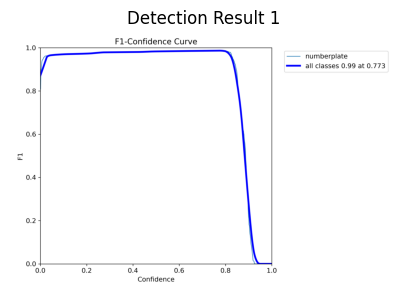


0: 448x640 (no detections), 7.7ms
Speed: 3.8ms preprocess, 7.7ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


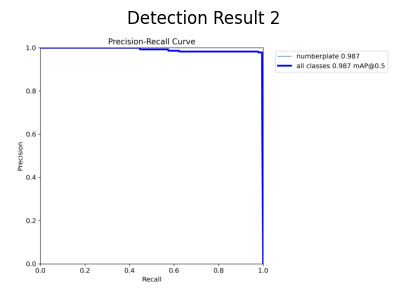


0: 448x640 (no detections), 7.7ms
Speed: 4.3ms preprocess, 7.7ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


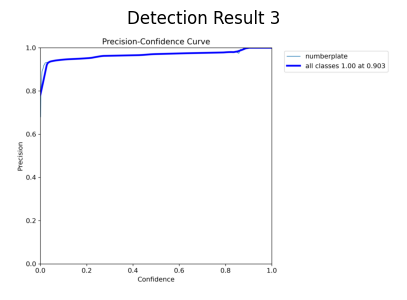


0: 448x640 (no detections), 9.5ms
Speed: 4.4ms preprocess, 9.5ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


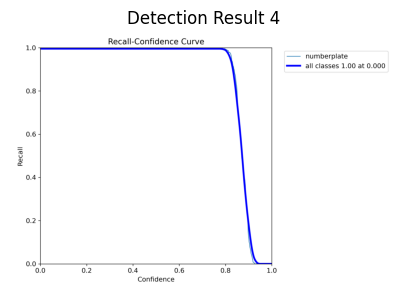


0: 480x640 (no detections), 38.6ms
Speed: 4.6ms preprocess, 38.6ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


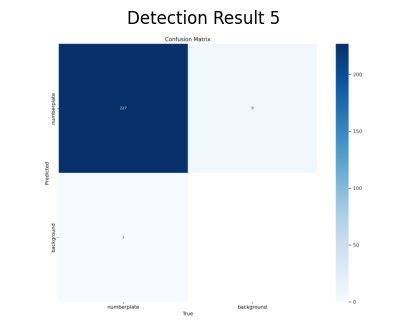

In [ ]:
# Step 10: Evaluation curves
import os
import cv2
import matplotlib.pyplot as plt

def get_latest_model_dir(parent_dir):
    dirs = [d for d in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, d))]
    latest_dir = max(dirs, key=lambda d: os.path.getmtime(os.path.join(parent_dir, d)))
    return os.path.join(parent_dir, latest_dir)

def show_detection_results(model, image_paths, num_images=5):
    for i, image_path in enumerate(image_paths[:num_images]):
        img = cv2.imread(image_path)
        results = model(img)
        result_img = results[0].plot() 
        plt.figure(figsize=(5, 5))
        plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f"Detection Result {i+1}")
        plt.show()

parent_dir = '/content/runs/detect'  

latest_model_dir = get_latest_model_dir(parent_dir)

image_paths = [
    os.path.join(latest_model_dir, 'F1_curve.png'),
    os.path.join(latest_model_dir, 'PR_curve.png'),
    os.path.join(latest_model_dir, 'P_curve.png'),
    os.path.join(latest_model_dir, 'R_curve.png'),
    os.path.join(latest_model_dir, 'confusion_matrix.png'),
    os.path.join(latest_model_dir, 'confusion_matrix_normalized.png')
]

show_detection_results(model, image_paths)  



0: 640x640 1 numberplate, 8.2ms
Speed: 3.4ms preprocess, 8.2ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)


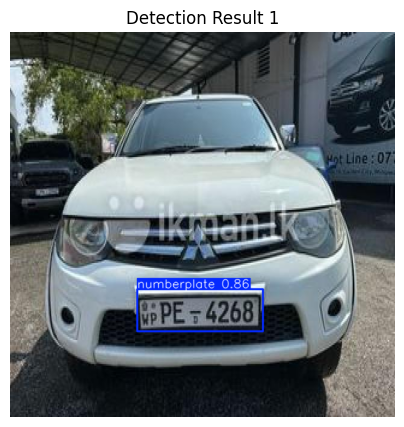


0: 640x640 1 numberplate, 9.8ms
Speed: 3.1ms preprocess, 9.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


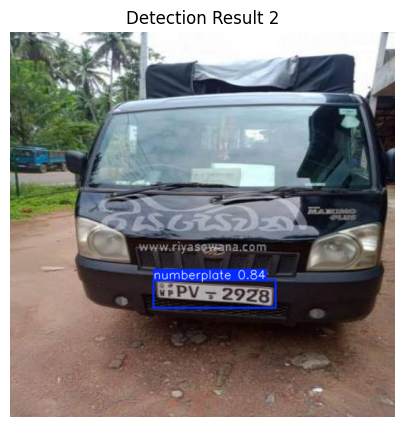


0: 640x640 1 numberplate, 10.5ms
Speed: 3.9ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


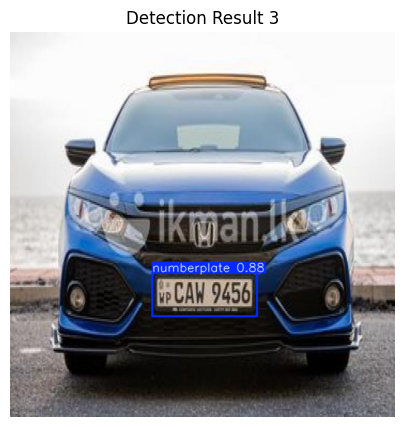


0: 640x640 1 numberplate, 8.9ms
Speed: 2.9ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


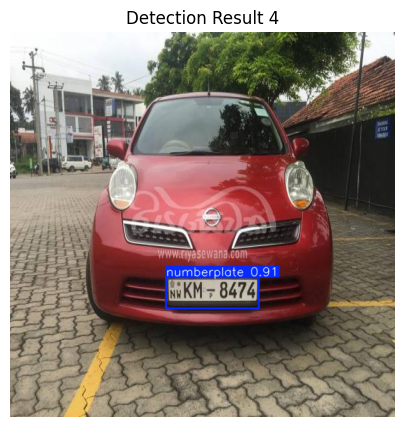


0: 640x640 1 numberplate, 11.1ms
Speed: 3.1ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


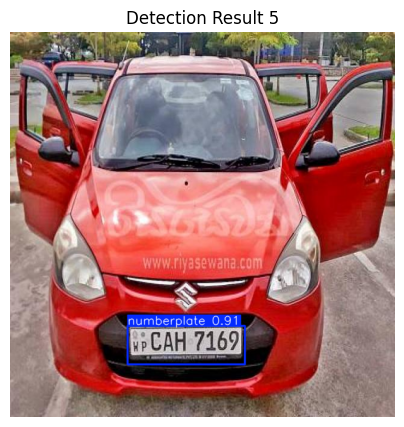

In [ ]:
# Step 11: Display Detection Results
def show_detection_results(model, image_dir, num_images=5):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir) if img.endswith(('.jpg', '.png'))]
    for i, image_path in enumerate(image_paths[:num_images]):
        img = cv2.imread(image_path)
        results = model(img)
        result_img = results[0].plot()  
        plt.figure(figsize=(5, 5))
        plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f"Detection Result {i+1}")
        plt.show()

show_detection_results(model, os.path.join(dataset.location, "valid", "images"))  


In [ ]:
# Step 11: Export the Model
model.export(format="onnx")


Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/license_plate_detection/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 241.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 kB 304.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 136.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 211.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 315.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 16.4s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opse

'runs/detect/license_plate_detection/weights/best.onnx'